In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Harris Corner Detector Implementation Process

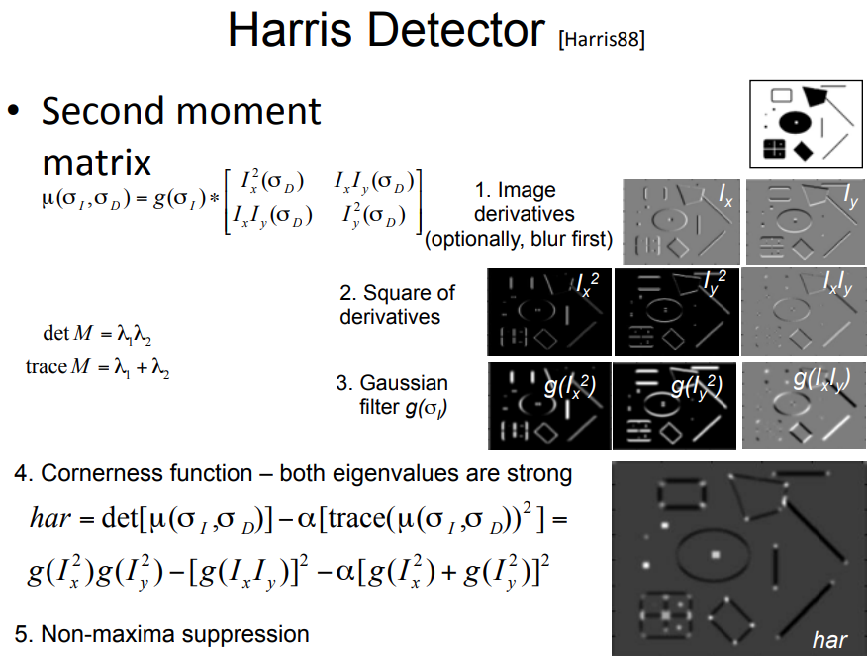

## Sobel and gaussian kernels defined here with numpy

In [2]:
# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")


 ## Convolution function from scratch. Alternatively, you can use opencv, skimage, pillow libraries.

In [3]:
def convolve(img, kernel):
    """
    Convolve function for odd dimensions.
    IT CONVOLVES IMAGES
    """
    if kernel.shape[0] % 2 != 1 or kernel.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    img_height = img.shape[0]
    img_width = img.shape[1]
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    
    pad = ((pad_height, pad_height), (pad_height, pad_width))
    g = np.empty(img.shape, dtype=np.float64)
    img = np.pad(img, pad, mode='constant', constant_values=0)
    # Do convolution
    for i in np.arange(pad_height, img_height+pad_height):
        for j in np.arange(pad_width, img_width+pad_width):
            roi = img[i - pad_height:i + pad_height +
                      1, j - pad_width:j + pad_width + 1]
            g[i - pad_height, j - pad_width] = (roi*kernel).sum()

    if (g.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        g = g + abs(np.amin(g))
        g = g / np.amax(g)
        g = (g*255.0)
    return g

## Harris function
- Image converted to grayscale
- Sobel filters convolved on image for both axis
- Square of derivatives and cross multiply calculated
- All axes filtered with gaussian kernel
- Cornerness Function used to calculate
- Non-max supression implemented
- Circles drawed on filtered points

In [4]:
def harris(img, threshold=0.6):

    img_cpy = img.copy() # copying image

    img1_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscaling (0-1)

    dx = convolve(img1_gray, SOBEL_X) # convolving with sobel filter on X-axis
    dy = convolve(img1_gray, SOBEL_Y) # convolving with sobel filter on Y-axis
    # square of derivatives
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxdy = dx*dy #cross filtering
    # gauss filter for all directions (x,y,cross axis)
    g_dx2 = convolve(dx2, GAUSS)
    g_dy2 = convolve(dy2, GAUSS)
    g_dxdy = convolve(dxdy, GAUSS)
    # Harris Function
    harris = g_dx2*g_dy2 - np.square(g_dxdy) - 0.12*np.square(g_dx2 + g_dy2) # r(harris) = det - k*(trace**2)
    # Normalizing inside (0-1)
    cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)

    # find all points above threshold (nonmax supression line)
    loc = np.where(harris >= threshold)
    # drawing filtered points
    for pt in zip(*loc[::-1]):
        cv2.circle(img_cpy, pt, 3, (0, 0, 255), -1)

    return img_cpy,g_dx2,g_dy2,dx,dy,loc

# Image Reading and Filtering Area

In [5]:
#img = cv2.imread('/kaggle/input/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0003.jpg')
img = cv2.imread('/kaggle/input/hogdata/corner-1.jpg')
corners,g_dx2,g_dy2,dx,dy,loc = harris(img,0.80)

## Raw Image and Sobel Filtered Images Visualization

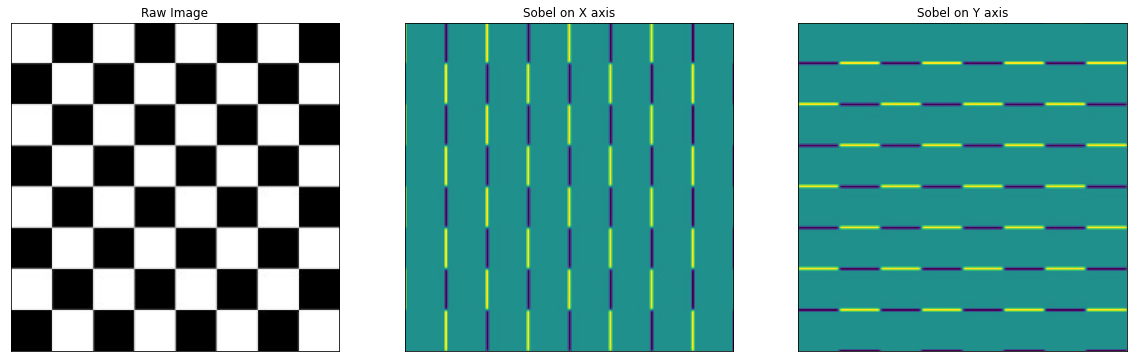

In [6]:
# display raw & filtered images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img)
plt.title("Raw Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dx)
plt.title("Sobel on X axis"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dy)
plt.title("Sobel on Y axis"), plt.xticks([]), plt.yticks([])
plt.show()

## Raw Image and Sobel-Gauss Filtered Images Visualization

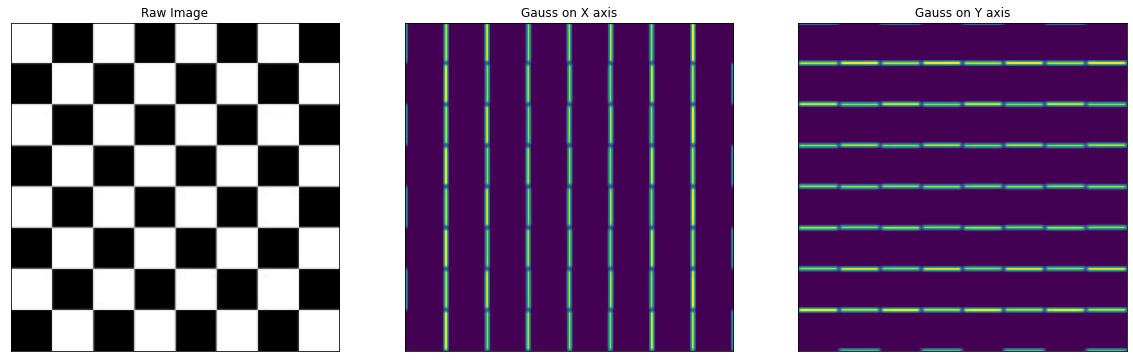

In [7]:
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img)
plt.title("Raw Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(g_dx2)
plt.title("Gauss on X axis"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(g_dy2)
plt.title("Gauss on Y axis"), plt.xticks([]), plt.yticks([])
plt.show()

## Raw Image and Harris Corner Output Visualization

(Text(0.5, 1.0, 'Harris Corner Output'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

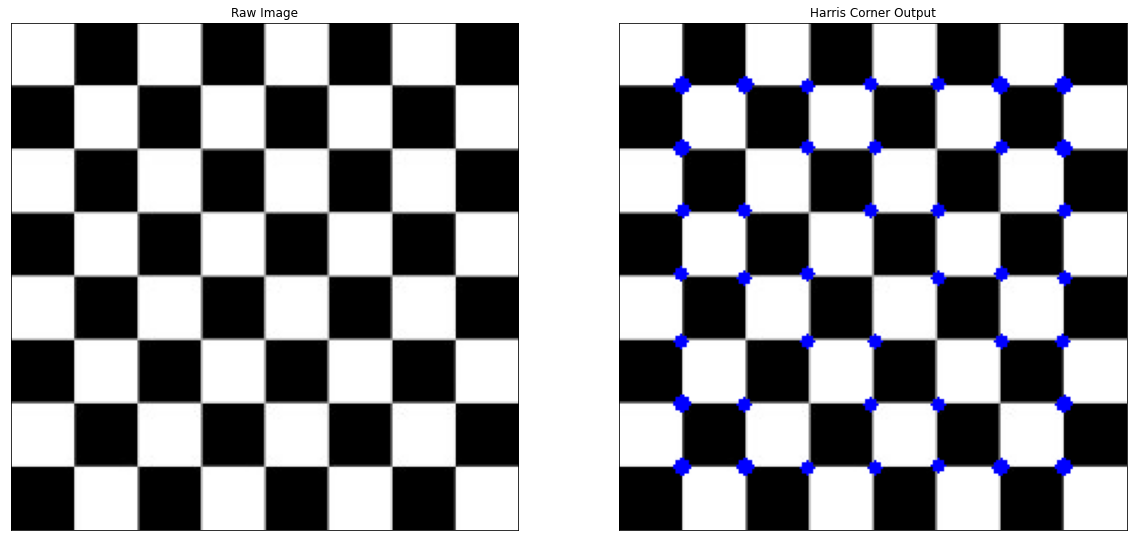

In [8]:
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img)
plt.title("Raw Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(corners)
plt.title("Harris Corner Output"), plt.xticks([]), plt.yticks([])